In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import helpers.mab_exp as expb
import helpers.mab_bernoulli as brn
import pandas as pd

In [2]:
#params
T = 1000
samples = 2000

armProbs = [0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
#armProbs = np.random.uniform(0, 1, size = 2)
K = len(armProbs)
#armDataAmt = [60 for _ in range(K)]
armDataAmt = [int(np.sqrt(T)) for _ in range(K)]

opt_arm = np.max(armProbs)

plotNum = 2
names = ["FS", "AR", "TS"]
colors = ["red", "green", "blue"]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Arms = [0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6] with data = [31, 31, 31, 31, 31, 31, 31, 31, 31, 31]')

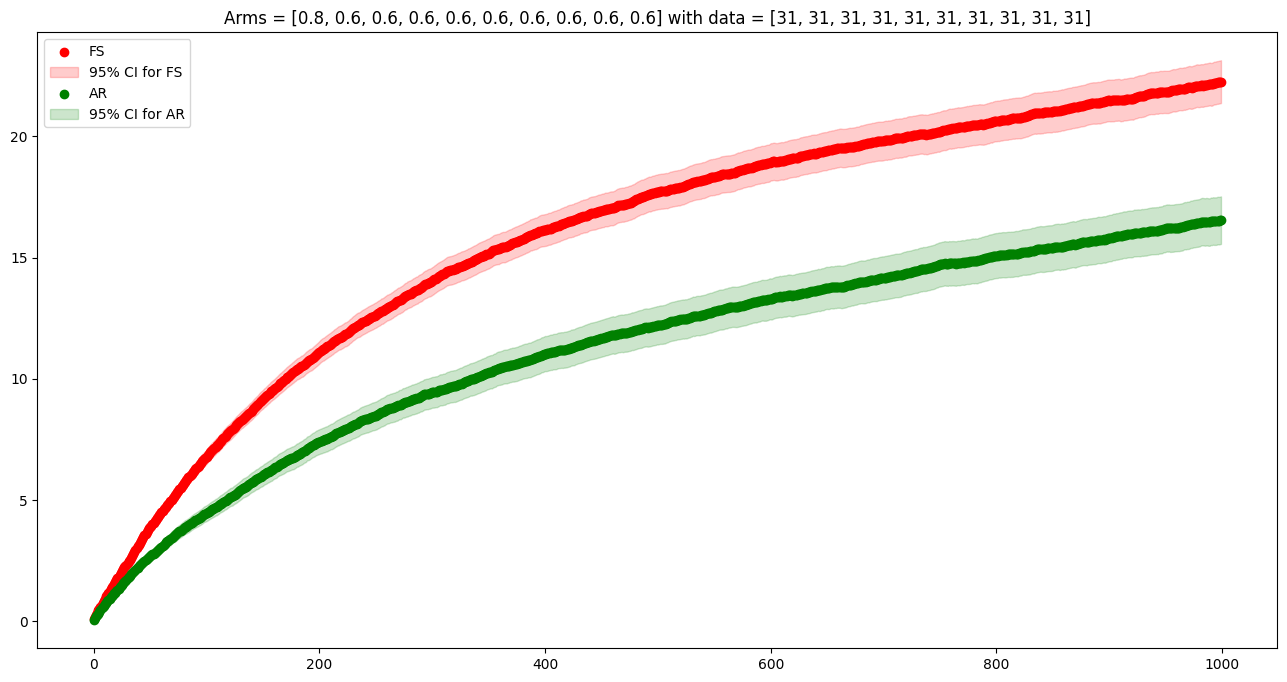

In [3]:
regret_vecs = [np.zeros((samples, T)) for _ in range(plotNum)]

for i in tqdm(range(samples)):
    armData = [brn.gen_data(armProbs[i], armDataAmt[i]) for i in range(K)]
    emptyData = [[] for _ in range(K)]

    fs_reward = brn.FS_path(T, armProbs, brn.flat_priors(K), armData)
    ar_reward = brn.AR_path(T, armProbs, brn.flat_priors(K), armData)
    #ts_reward = expb.FS(T, armProbs, expb.flat_priors(K), emptyData)


    regret_vecs[0][i] = np.cumsum(opt_arm - fs_reward)
    regret_vecs[1][i] = np.cumsum(opt_arm - ar_reward)
    #regret_vecs[2][i] = np.cumsum(opt_arm - ts_reward)
    #regret_vecs[0][i] = np.cumsum(opt_arm - ucb_rew)
    #regret_vecs[2][i] = np.cumsum(opt_arm - gitt_fs)
    #regret_vecs[3][i] = np.cumsum(opt_arm - gitt_fs_mono)
    #regret_vecs[1][i] = np.cumsum(opt_arm - ucb_mono)
    #regret_vecs[4][i] = np.cumsum(opt_arm - gitt_ar)
    #regret_vecs[5][i] = np.cumsum(opt_arm - gitt_ar_mono)

avg_regrets = []
regret_CIs = []
for i in range(plotNum):
  avg = np.mean(regret_vecs[i], axis=0)
  avg_regrets.append(avg)
  regret_CIs.append([avg-2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples),
                       avg+2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples)])

c = np.arange(T)
plt.rcParams["figure.figsize"] = (16,8)
for i in range(plotNum):
    plt.scatter(c,avg_regrets[i],label=names[i],color=colors[i])
    #plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
    plt.fill_between(c, regret_CIs[i][0][:],regret_CIs[i][1][:],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
random_regret = opt_arm - np.mean(armProbs)
#plt.scatter(c,c * random_regret,label="Random regret",color="black")
#plt.scatter(c,c * (opt_arm - np.min(armProbs)),label="Worst-case regret",color="brown")
plt.legend()
plt.title("Arms = " + str(armProbs) + " with data = " +str(armDataAmt))

Text(0.5, 1.0, 'Arms = [0.6, 0.8] with data = [100, 100]')

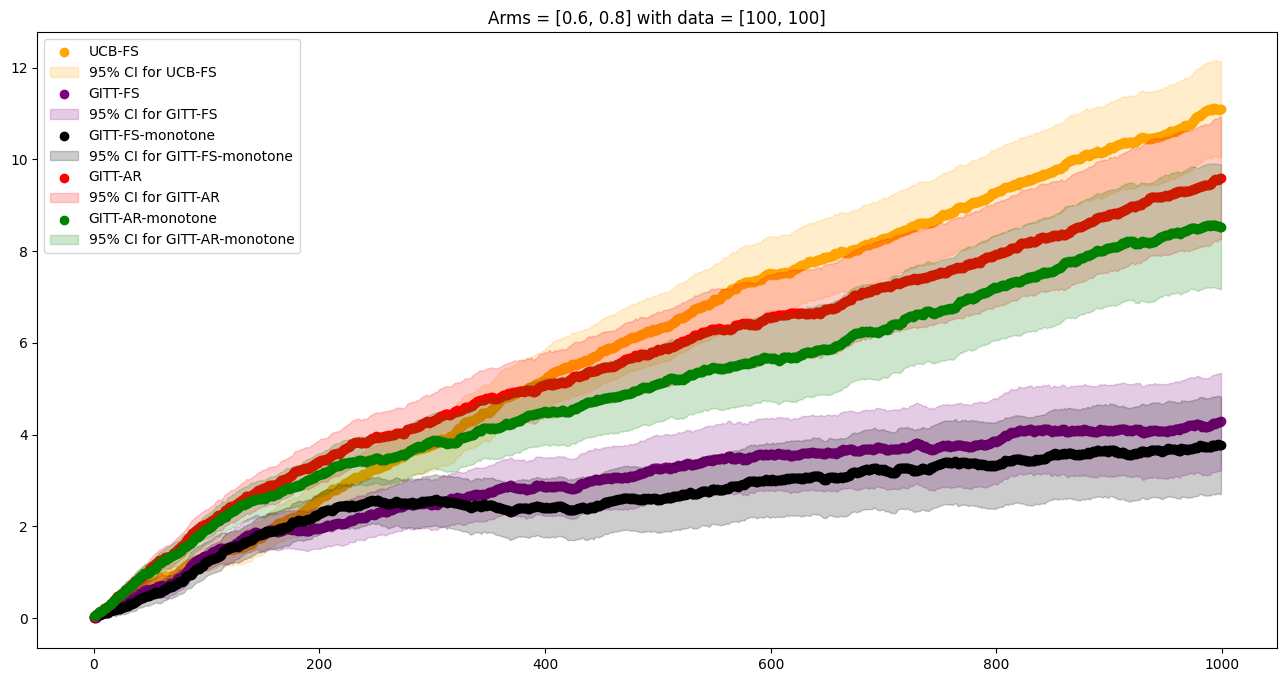

In [9]:
c = np.arange(T)
plt.rcParams["figure.figsize"] = (16,8)
for i in range(plotNum):
    if(i != 3):
        plt.scatter(c,avg_regrets[i],label=names[i],color=colors[i])
        #plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
        plt.fill_between(c, regret_CIs[i][0][:],regret_CIs[i][1][:],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
random_regret = opt_arm - np.mean(armProbs)
#plt.scatter(c,c * random_regret,label="Random regret",color="black")
#plt.scatter(c,c * (opt_arm - np.min(armProbs)),label="Worst-case regret",color="brown")
plt.legend()
plt.title("Arms = " + str(armProbs) + " with data = " +str(armDataAmt))

In [4]:
#params
T = 1000
samples = 5000


armProbs = [0.8, 0.6]
armDataAmt = [100, 100]

#armProbs = np.random.uniform(0, 1, size = 5)
K = len(armProbs)
#armDataAmt = [int(2*np.sqrt(T)) for _ in range(K)]

opt_arm = np.max(armProbs)

plotNum = 4
names = ["GITT-FS","GITT-FS-monotone", "GITT-AR", "GITT-AR-monotone"]
colors = ["orange", "purple", "black", "green", "red", "green"]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Arms = [0.8, 0.6] with data = [100, 100]')

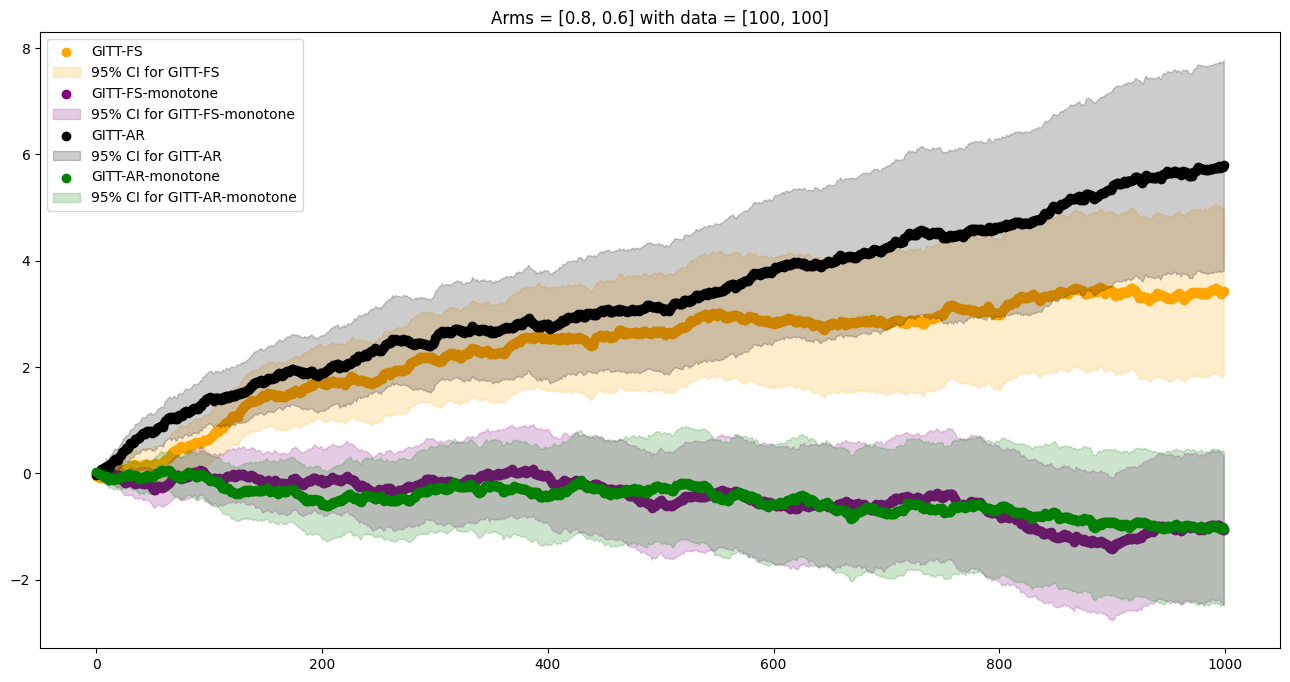

In [5]:
regret_vecs = [np.zeros((samples, T)) for _ in range(plotNum)]
TAU = 1

for i in tqdm(range(samples)):
    armData = [np.random.normal(armProbs[i], np.sqrt(1/TAU), armDataAmt[i]) for i in range(K)]
    emptyData = [[] for _ in range(K)]

    gitt_fs = gsn.gittins_FS(T, armProbs, gsn.flat_priors(K), armData, TAU)
    gitt_fs_mono = gsn.gittins_FS_monotone(T, armProbs, gsn.flat_priors(K), armData, TAU)
    gitt_ar = gsn.gittins_AR(T, armProbs, gsn.flat_priors(K), armData, TAU)
    gitt_ar_mono = gsn.gittins_AR_monotone(T, armProbs, gsn.flat_priors(K), armData, TAU)

    regret_vecs[0][i] = np.cumsum(opt_arm - gitt_fs)
    regret_vecs[1][i] = np.cumsum(opt_arm - gitt_fs_mono)
    regret_vecs[2][i] = np.cumsum(opt_arm - gitt_ar)
    regret_vecs[3][i] = np.cumsum(opt_arm - gitt_ar_mono)

avg_regrets = []
regret_CIs = []
for i in range(plotNum):
  avg = np.mean(regret_vecs[i], axis=0)
  avg_regrets.append(avg)
  regret_CIs.append([avg-2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples),
                       avg+2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples)])

c = np.arange(T)
plt.rcParams["figure.figsize"] = (16,8)
for i in range(plotNum):
    plt.scatter(c,avg_regrets[i],label=names[i],color=colors[i])
    #plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
    plt.fill_between(c, regret_CIs[i][0][:],regret_CIs[i][1][:],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
random_regret = opt_arm - np.mean(armProbs)
#plt.scatter(c,c * random_regret,label="Random regret",color="black")
#plt.scatter(c,c * (opt_arm - np.min(armProbs)),label="Worst-case regret",color="brown")
plt.legend()
plt.title("Arms = " + str(armProbs) + " with data = " +str(armDataAmt))

In [26]:
#save data to file
df = pd.DataFrame(np.transpose(avg_regrets))
df.rename(columns={i: names[i] for i in range(plotNum)}, inplace=True)
df["time"] = c
fileName = "RegretOverTime_Data=sqrt(T)_" + "arms=" + str(armProbs) +"_"+str(samples)+"pts.csv"
df.to_csv(fileName)
df

,UCB-FS,GITT-FS,GITT-monotone,TS,time
0,-0.005324,0.007385,0.039444,0.003733,0
1,0.027457,0.028981,0.023382,0.203516,1
2,0.067527,0.019392,0.009167,0.278204,2
3,0.070920,0.054619,0.018831,0.394074,3
4,0.064573,0.051186,0.017951,0.492446,4
...,...,...,...,...,...
995,11.858727,5.039410,4.610924,24.003568,995
996,11.876277,5.045941,4.618096,24.014217,996
997,11.875420,5.042876,4.621494,24.030087,997
998,11.883212,5.041885,4.632364,24.048009,998


In [7]:
#params
K = 5
T = 800
samples = 100

armProbs = np.random.uniform(size = K)
armProbs = [0.8, 0.6]
#K = len(armProbs)
armDataAmt = [0 for _ in range(K)]
opt_arm = np.max(armProbs)

plotNum = 4
names = ["TS", "UCB-FS", "GITT", "partialfix"]
colors = ["blue" , "red", "green", "orange", "purple", "black", "brown"]

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Arms = [0.8, 0.6] with data = [0, 0, 0, 0, 0]')

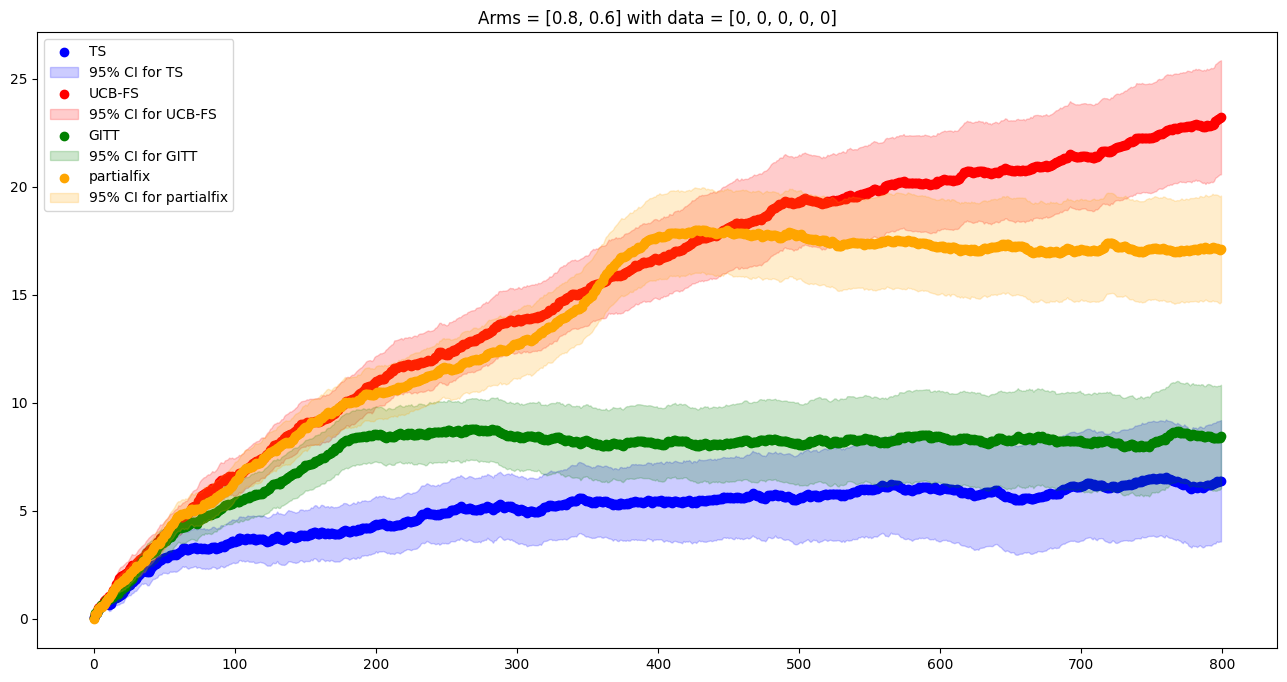

In [8]:
regret_vecs = [np.zeros((samples, T)) for _ in range(plotNum)]

for i in tqdm(range(samples)):
    armData = [np.random.binomial(1, armProbs[i], armDataAmt[i]) for i in range(len(armProbs))]

    ts_reward = ALGS.FS(T, armProbs, [[1,1] for _ in armProbs])
    ucb_rew = ALGS.UCB_FS(T, armProbs, armData)
    gitt_rew = GITT.gittins_FS(T, armProbs, armData)
    gitt_old = GITT.gittins_old(T, armProbs, armData)

    regret_vecs[0][i] = np.cumsum(opt_arm - ts_reward)
    regret_vecs[1][i] = np.cumsum(opt_arm - ucb_rew)
    regret_vecs[2][i] = np.cumsum(opt_arm - gitt_rew)
    regret_vecs[3][i] = np.cumsum(opt_arm - gitt_old)

avg_regrets = []
regret_CIs = []
for i in range(plotNum):
  avg = np.mean(regret_vecs[i], axis=0)
  avg_regrets.append(avg)
  regret_CIs.append([avg-2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples),
                       avg+2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples)])

c = np.arange(T)
plt.rcParams["figure.figsize"] = (16,8)
for i in range(plotNum):
    plt.scatter(c,avg_regrets[i],label=names[i],color=colors[i])
    #plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
    plt.fill_between(c, regret_CIs[i][0][:],regret_CIs[i][1][:],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
plt.legend()
plt.title("Arms = " + str(armProbs) + " with data = " +str(armDataAmt))